In [ ]:
# Import libraries
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import RandomOverSampler

import time
import copy

In [ ]:
# Import data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hyb_labeled.csv')

#EDA

In [ ]:
df.head()

,Female GIDXMale GID,ch01_56003,ch01_73006,ch01_73241,ch01_81479,ch01_100407,ch01_143440,ch01_153453,ch01_179012,ch01_190715,...,ch12_66359854,ch12_66366548,ch12_66367291,ch12_66376737,ch12_66406158,ch12_66447604,ch12_66504444,ch12_66616839,score,pass
0,1831334X1786150,0,4.0,0,0.0,2.0,0.0,0.0,0,0.0,...,2.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,0
1,1831334X1828997,0,3.5,0,0.0,-498.0,2.0,0.0,2,0.0,...,2.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,5.0,1
2,1831334X1787305,0,4.0,0,0.0,2.0,0.0,0.0,0,0.0,...,2.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,2.5,0
3,1831334X1829705,0,4.0,0,0.0,2.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1
4,1831334X1787116,0,4.0,0,0.0,2.0,0.0,0.0,0,0.0,...,2.0,2.0,1.5,0.0,2.0,2.0,2.0,2.0,2.5,0


In [ ]:
df.isna().sum().sum()

9

In [ ]:
ds['score'].isna()

In [ ]:
df.replace(np.nan,-1000)

,Female GIDXMale GID,ch01_56003,ch01_73006,ch01_73241,ch01_81479,ch01_100407,ch01_143440,ch01_153453,ch01_179012,ch01_190715,...,ch12_66359854,ch12_66366548,ch12_66367291,ch12_66376737,ch12_66406158,ch12_66447604,ch12_66504444,ch12_66616839,score,pass
0,1831334X1786150,0,4.0,0,0.0,2.0,0.0,0.0,0,0.0,...,2.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,0
1,1831334X1828997,0,3.5,0,0.0,-498.0,2.0,0.0,2,0.0,...,2.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,5.0,1
2,1831334X1787305,0,4.0,0,0.0,2.0,0.0,0.0,0,0.0,...,2.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,2.5,0
3,1831334X1829705,0,4.0,0,0.0,2.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1
4,1831334X1787116,0,4.0,0,0.0,2.0,0.0,0.0,0,0.0,...,2.0,2.0,1.5,0.0,2.0,2.0,2.0,2.0,2.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,1829153X1831326,0,4.0,0,0.0,4.0,0.0,0.0,0,0.0,...,2.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,1.0,0
376,1829153X1831341,0,4.0,0,0.0,4.0,0.0,0.0,0,0.0,...,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0
377,1829153X1831327,0,4.0,0,0.0,4.0,0.0,0.0,0,0.0,...,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
378,1829153X1829309,0,4.0,0,0.0,4.0,0.0,0.0,0,0.0,...,2.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,3.0,1


In [ ]:
df.describe()

,ch01_56003,ch01_73006,ch01_73241,ch01_81479,ch01_100407,ch01_143440,ch01_153453,ch01_179012,ch01_190715,ch01_203573,...,ch12_66359854,ch12_66366548,ch12_66367291,ch12_66376737,ch12_66406158,ch12_66447604,ch12_66504444,ch12_66616839,score,pass
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.00000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,371.000000,380.000000
mean,0.078947,3.532895,-15.710526,0.222368,-160.942105,-0.867105,0.215789,0.144737,0.222368,0.222368,...,2.55000,2.264474,1.453947,0.097368,2.165789,2.207895,2.171053,2.136842,2.315094,0.097368
std,0.416137,0.926506,87.568686,0.631119,342.620159,25.635101,0.625545,0.516328,0.631119,0.631119,...,1.32666,1.249982,0.855595,0.426365,1.224804,1.235551,1.245447,1.272175,1.255534,0.296850
min,0.000000,0.000000,-500.000000,0.000000,-2000.000000,-499.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.00000,2.000000,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000
50%,0.000000,4.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.00000,2.000000,1.500000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
75%,0.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.00000,4.000000,2.000000,0.000000,2.500000,2.500000,2.500000,2.500000,3.000000,0.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,...,4.00000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,5.000000,1.000000


#Baseline Model

In [ ]:
class SimpleClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4693, 1024)
        self.fc2 = nn.Linear(1024, 32)
        self.fc3 = nn.Linear(32, 1)
        
    def forward(self, x):
        #print(x.shape)
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        #print(x.shape)
        x = F.relu(self.fc1(x))
        #print(x.shape)
        x = F.relu(self.fc2(x))
        #print(x.shape)
        x = F.log_softmax(self.fc3(x), dim=1)
        #print(x)
        
        return x

In [ ]:
model = SimpleClassifier()
# TODO: after you implement the CNNClassifier, you can use it here
# model = CNNClassifier

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.3)

In [ ]:
# Use GPU if it's available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# "move" model onto device. we'll also "move" our data in the train-test process
model.to(device)

SimpleClassifier(
  (fc1): Linear(in_features=4693, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)

#Splitting & Encoding

In [ ]:
y_score = df['score']
y_pass = df['pass']
X = df.drop(columns=['Female GIDXMale GID','score','pass'])
y = y_pass.astype(np.int64)

In [ ]:
X.shape,y.shape

((380, 4693), (380,))

In [ ]:
mm = MinMaxScaler(feature_range=(0,1))
X_mm = mm.fit_transform(X)

X_mm.shape

(380, 4693)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X_mm), y, test_size = 0.20, random_state = 42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size = 0.20, random_state = 42)

X_train_tens = torch.Tensor(X_train.to_numpy())
y_train_tens = torch.Tensor(y_train.to_numpy()).view(y_train.shape[0],1).long()

X_dev_tens = torch.Tensor(X_dev.to_numpy())
y_dev_tens = torch.Tensor(y_dev.to_numpy()).view(y_dev.shape[0],1).long()

X_train_tens.shape,y_train_tens.shape,X_dev_tens.shape,y_dev_tens.shape

(torch.Size([243, 4693]),
 torch.Size([243, 1]),
 torch.Size([61, 4693]),
 torch.Size([61, 1]))

In [ ]:
train_set = torch.utils.data.TensorDataset(X_train_tens, y_train_tens)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=20, shuffle=True)
dev_set = torch.utils.data.TensorDataset(X_dev_tens, y_dev_tens)
dev_loader = torch.utils.data.DataLoader(dev_set, batch_size=5, shuffle=True)

##Training

In [ ]:
def train(train,epochs=10):

  train_losses = []

  for e in range(epochs):
    train_loss = 0
    accuracy = 0
    # train loop
    model.train()
    for i,(features, labels) in enumerate(train):
      #print(features.shape,labels.shape)
      features, labels = features.to(device), labels.to(device)

      optimizer.zero_grad()
      #print(features.dtype)
      pred = model(features)
      #print(pred.shape,labels.shape)
      loss = criterion(pred.squeeze(1), labels.squeeze(1))
      loss.backward()
      optimizer.step()
        
      train_loss += loss.item()
      train_losses.append(train_loss/len(train))

      exp_pred = torch.exp(pred)
      top_p, top_class = exp_pred.topk(1, dim=1)
      equals = top_class == labels.view(*top_class.shape)
      accuracy += torch.mean(equals.type(torch.FloatTensor))

    print("Epoch: {}/{}.. ".format(e+1, epochs),
          "Training Loss: {:.3f}.. ".format(train_loss),
          "Train Accuracy: {:.3f}".format(accuracy/len(train)))

In [ ]:
train(train_loader)

Epoch: 1/10..  Training Loss: 0.000..  Train Accuracy: 0.864
Epoch: 2/10..  Training Loss: 0.000..  Train Accuracy: 0.864
Epoch: 3/10..  Training Loss: 0.000..  Train Accuracy: 0.908
Epoch: 4/10..  Training Loss: 0.000..  Train Accuracy: 0.886
Epoch: 5/10..  Training Loss: 0.000..  Train Accuracy: 0.908
Epoch: 6/10..  Training Loss: 0.000..  Train Accuracy: 0.908
Epoch: 7/10..  Training Loss: 0.000..  Train Accuracy: 0.908
Epoch: 8/10..  Training Loss: 0.000..  Train Accuracy: 0.908
Epoch: 9/10..  Training Loss: 0.000..  Train Accuracy: 0.908
Epoch: 10/10..  Training Loss: 0.000..  Train Accuracy: 0.908


## Predict and Evaluation

In [ ]:
def test(test,epochs=10):

  dev_losses = []

  for e in range(epochs):
    dev_loss = 0
    accuracy = 0
    with torch.no_grad():
      model.eval()
      for i,(features, labels) in enumerate(test):
        features, labels = features.to(device), labels.to(device)

        pred = model(features)
        #print(pred.shape,labels.shape)
        dev_loss += criterion(pred.squeeze(1), labels.squeeze(1)).item()
                
        exp_pred = torch.exp(pred)
        top_p, top_class = exp_pred.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
              
        dev_losses.append(dev_loss/len(test))

      print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Test Loss: {:.3f}.. ".format(dev_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(test)))

In [ ]:
test(dev_loader)

Epoch: 1/10..  Test Loss: 0.000..  Test Accuracy: 0.908
Epoch: 2/10..  Test Loss: 0.000..  Test Accuracy: 0.908
Epoch: 3/10..  Test Loss: 0.000..  Test Accuracy: 0.908
Epoch: 4/10..  Test Loss: 0.000..  Test Accuracy: 0.908
Epoch: 5/10..  Test Loss: 0.000..  Test Accuracy: 0.908
Epoch: 6/10..  Test Loss: 0.000..  Test Accuracy: 0.908
Epoch: 7/10..  Test Loss: 0.000..  Test Accuracy: 0.908
Epoch: 8/10..  Test Loss: 0.000..  Test Accuracy: 0.908
Epoch: 9/10..  Test Loss: 0.000..  Test Accuracy: 0.908
Epoch: 10/10..  Test Loss: 0.000..  Test Accuracy: 0.908


# Problem : Model learns to trick us by always taking the majority class!!
## Solution: replicate observations within the positive class

In [ ]:
X = df.drop(columns=['Female GIDXMale GID','score','pass'])
y = y_pass.astype(np.int64)
oversample = RandomOverSampler(sampling_strategy=0.5)
X, y = oversample.fit_resample(X, y)
X.shape,y.shape,y.value_counts()

((514, 4693), (514,), 0    343
 1    171
 Name: pass, dtype: int64)

In [ ]:
mm = MinMaxScaler(feature_range=(0,1))
X_mm = mm.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X_mm), y, test_size = 0.20, random_state = 42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size = 0.20, random_state = 42)

X_train_tens = torch.Tensor(X_train.to_numpy())
y_train_tens = torch.Tensor(y_train.to_numpy()).view(y_train.shape[0],1).long()

X_dev_tens = torch.Tensor(X_dev.to_numpy())
y_dev_tens = torch.Tensor(y_dev.to_numpy()).view(y_dev.shape[0],1).long()

train_set = torch.utils.data.TensorDataset(X_train_tens, y_train_tens)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=20, shuffle=True)
dev_set = torch.utils.data.TensorDataset(X_dev_tens, y_dev_tens)
dev_loader = torch.utils.data.DataLoader(dev_set, batch_size=5, shuffle=True)

In [ ]:
train(train_loader,50)

Epoch: 1/50..  Training Loss: 0.000..  Train Accuracy: 0.662
Epoch: 2/50..  Training Loss: 0.000..  Train Accuracy: 0.657
Epoch: 3/50..  Training Loss: 0.000..  Train Accuracy: 0.653
Epoch: 4/50..  Training Loss: 0.000..  Train Accuracy: 0.649
Epoch: 5/50..  Training Loss: 0.000..  Train Accuracy: 0.653
Epoch: 6/50..  Training Loss: 0.000..  Train Accuracy: 0.662
Epoch: 7/50..  Training Loss: 0.000..  Train Accuracy: 0.644
Epoch: 8/50..  Training Loss: 0.000..  Train Accuracy: 0.653
Epoch: 9/50..  Training Loss: 0.000..  Train Accuracy: 0.653
Epoch: 10/50..  Training Loss: 0.000..  Train Accuracy: 0.644
Epoch: 11/50..  Training Loss: 0.000..  Train Accuracy: 0.662
Epoch: 12/50..  Training Loss: 0.000..  Train Accuracy: 0.635
Epoch: 13/50..  Training Loss: 0.000..  Train Accuracy: 0.653
Epoch: 14/50..  Training Loss: 0.000..  Train Accuracy: 0.644
Epoch: 15/50..  Training Loss: 0.000..  Train Accuracy: 0.653
Epoch: 16/50..  Training Loss: 0.000..  Train Accuracy: 0.640
Epoch: 17/50..  T

In [ ]:
test(dev_loader,20)

Epoch: 1/20..  Test Loss: 0.000..  Test Accuracy: 0.682
Epoch: 2/20..  Test Loss: 0.000..  Test Accuracy: 0.675
Epoch: 3/20..  Test Loss: 0.000..  Test Accuracy: 0.675
Epoch: 4/20..  Test Loss: 0.000..  Test Accuracy: 0.675
Epoch: 5/20..  Test Loss: 0.000..  Test Accuracy: 0.675
Epoch: 6/20..  Test Loss: 0.000..  Test Accuracy: 0.675
Epoch: 7/20..  Test Loss: 0.000..  Test Accuracy: 0.675
Epoch: 8/20..  Test Loss: 0.000..  Test Accuracy: 0.667
Epoch: 9/20..  Test Loss: 0.000..  Test Accuracy: 0.675
Epoch: 10/20..  Test Loss: 0.000..  Test Accuracy: 0.675
Epoch: 11/20..  Test Loss: 0.000..  Test Accuracy: 0.659
Epoch: 12/20..  Test Loss: 0.000..  Test Accuracy: 0.675
Epoch: 13/20..  Test Loss: 0.000..  Test Accuracy: 0.675
Epoch: 14/20..  Test Loss: 0.000..  Test Accuracy: 0.659
Epoch: 15/20..  Test Loss: 0.000..  Test Accuracy: 0.675
Epoch: 16/20..  Test Loss: 0.000..  Test Accuracy: 0.675
Epoch: 17/20..  Test Loss: 0.000..  Test Accuracy: 0.675
Epoch: 18/20..  Test Loss: 0.000..  Test

# CNN based model with 1D Conv.

In [ ]:
class CNNClassifier(nn.Module):

  def __init__(self):
    super(CNNClassifier,self).__init__()

    self.conv1 = nn.Conv1d(1,3,5)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(0.2)
    self.conv2 = nn.Conv1d(3,7,3)
    self.pooling = nn.MaxPool1d(11,stride=3)
    self.flat = nn.Flatten()
    self.fc1 = nn.Linear(10913,256)
    self.fc2 = nn.Linear(256,16)
    self.output = nn.Linear(16,1)
    self.soft = nn.LogSoftmax(dim=1)

  def forward(self,X):

    X = X.unsqueeze(1)
    #print(X.shape)
    #(batch=*,1,height=1,width=4693)
    out = self.conv1(X.double())
    #(*,3,height=1,width=4693)
    out = self.relu(out)
    out = self.dropout(out)

    out = self.conv2(out)
    #(*,7,height=1,width=4693)
    out = self.relu(out)
    out = self.pooling(out)
    #(*,7,height=1,width=floor(((4693-11)/3)-1)=1559)
    out = self.flat(out)
    #(*,7*1559=10913)
    out = self.fc1(out)
    #(*,256)
    out = self.relu(out)
    out = self.fc2(out)
    #(*,16)
    out = self.relu(out)
    out = self.output(out)
    #(*,1)
    return self.soft(out)


In [ ]:
model = CNNClassifier()
# TODO: after you implement the CNNClassifier, you can use it here
# model = CNNClassifier

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.03)

In [ ]:
# Use GPU if it's available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# "move" model onto device. we'll also "move" our data in the train-test process
model.to(device)

CNNClassifier(
  (conv1): Conv1d(1, 3, kernel_size=(5,), stride=(1,))
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (conv2): Conv1d(3, 7, kernel_size=(3,), stride=(1,))
  (pooling): MaxPool1d(kernel_size=11, stride=3, padding=0, dilation=1, ceil_mode=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=10913, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=1, bias=True)
  (soft): LogSoftmax(dim=1)
)

## Train & Test model

In [ ]:
train(train_loader,50)

Epoch: 1/50..  Training Loss: 0.000..  Train Accuracy: 0.653
Epoch: 2/50..  Training Loss: 0.000..  Train Accuracy: 0.649
Epoch: 3/50..  Training Loss: 0.000..  Train Accuracy: 0.640
Epoch: 4/50..  Training Loss: 0.000..  Train Accuracy: 0.662
Epoch: 5/50..  Training Loss: 0.000..  Train Accuracy: 0.657
Epoch: 6/50..  Training Loss: 0.000..  Train Accuracy: 0.649
Epoch: 7/50..  Training Loss: 0.000..  Train Accuracy: 0.644
Epoch: 8/50..  Training Loss: 0.000..  Train Accuracy: 0.653
Epoch: 9/50..  Training Loss: 0.000..  Train Accuracy: 0.635
Epoch: 10/50..  Training Loss: 0.000..  Train Accuracy: 0.649
Epoch: 11/50..  Training Loss: 0.000..  Train Accuracy: 0.649
Epoch: 12/50..  Training Loss: 0.000..  Train Accuracy: 0.649
Epoch: 13/50..  Training Loss: 0.000..  Train Accuracy: 0.649
Epoch: 14/50..  Training Loss: 0.000..  Train Accuracy: 0.644
Epoch: 15/50..  Training Loss: 0.000..  Train Accuracy: 0.649
Epoch: 16/50..  Training Loss: 0.000..  Train Accuracy: 0.640
Epoch: 17/50..  T

In [ ]:
test(dev_loader,20)

Epoch: 1/20..  Test Loss: 0.000..  Test Accuracy: 0.659
Epoch: 2/20..  Test Loss: 0.000..  Test Accuracy: 0.667
Epoch: 3/20..  Test Loss: 0.000..  Test Accuracy: 0.675
Epoch: 4/20..  Test Loss: 0.000..  Test Accuracy: 0.675
Epoch: 5/20..  Test Loss: 0.000..  Test Accuracy: 0.675
Epoch: 6/20..  Test Loss: 0.000..  Test Accuracy: 0.675
Epoch: 7/20..  Test Loss: 0.000..  Test Accuracy: 0.675
Epoch: 8/20..  Test Loss: 0.000..  Test Accuracy: 0.675
Epoch: 9/20..  Test Loss: 0.000..  Test Accuracy: 0.675
Epoch: 10/20..  Test Loss: 0.000..  Test Accuracy: 0.675
Epoch: 11/20..  Test Loss: 0.000..  Test Accuracy: 0.675
Epoch: 12/20..  Test Loss: 0.000..  Test Accuracy: 0.682
Epoch: 13/20..  Test Loss: 0.000..  Test Accuracy: 0.675
Epoch: 14/20..  Test Loss: 0.000..  Test Accuracy: 0.667
Epoch: 15/20..  Test Loss: 0.000..  Test Accuracy: 0.682
Epoch: 16/20..  Test Loss: 0.000..  Test Accuracy: 0.667
Epoch: 17/20..  Test Loss: 0.000..  Test Accuracy: 0.667
Epoch: 18/20..  Test Loss: 0.000..  Test

###VERY IMPORTANT! CNN model implies FUNCTIONAL dependency between adjacent features which isn't necessarily what happens in the DNA. This is why I will proceed with the baseline model.

##Hyperparams for the CNN model

###1. Tune epochs and batch size

In [ ]:
!pip install skorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.7/193.7 KB 6.0 MB/s eta 0:00:00


In [ ]:
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV
import torch.nn.init as init

In [ ]:
mm = MinMaxScaler(feature_range=(0,1))
X_mm = mm.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X_mm), y, test_size = 0.20, random_state = 42)
X_train = torch.tensor(X_train.values,dtype=torch.float32)
y_train = torch.tensor(y_train.values,dtype=torch.float32).reshape(-1, 1)

In [ ]:
class AdvancedClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4693, 2048)
        self.fc1_2 = nn.Linear(2048, 1024)
        self.fc1_3 = nn.Linear(1024, 1024)
        self.fc2 = nn.Linear(1024, 64)
        self.fc3 = nn.Linear(64, 1)
        
    def forward(self, x):
        #print(x.shape)
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        #print(x.shape)
        x = F.relu(self.fc1(x))
        #print(x.shape)
        x = F.relu(self.fc1_2(x))
        #print(x.shape)
        x = F.relu(self.fc1_3(x))
        #print(x.shape)
        x = F.relu(self.fc2(x))
        #print(x.shape)
        x = F.log_softmax(self.fc3(x), dim=1)
        #print(x)
        
        return x

In [ ]:
# create model
model = NeuralNetClassifier(
    AdvancedClassifier,
    criterion = nn.BCELoss,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu"),
    verbose=False
)

In [ ]:
# define the grid search parameters
'''
param_grid = {
    'batch_size': [10, 25, 50, 75],
    'max_epochs': [10, 50, 100],
    'optimizer': [optim.SGD, optim.RMSprop, optim.Adagrad, optim.Adadelta,
                  optim.Adam, optim.Adamax, optim.NAdam],
    'optimizer__lr': [0.001, 0.01, 0.1, 0.2, 0.3]
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train, y_train)
 
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
'''

Best: 0.654511 using {'batch_size': 10, 'max_epochs': 10, 'optimizer': <class 'torch.optim.sgd.SGD'>, 'optimizer__lr': 0.001}
0.654511 (0.005111) with: {'batch_size': 10, 'max_epochs': 10, 'optimizer': <class 'torch.optim.sgd.SGD'>, 'optimizer__lr': 0.001}
0.654511 (0.005111) with: {'batch_size': 10, 'max_epochs': 10, 'optimizer': <class 'torch.optim.sgd.SGD'>, 'optimizer__lr': 0.01}
0.654511 (0.005111) with: {'batch_size': 10, 'max_epochs': 10, 'optimizer': <class 'torch.optim.sgd.SGD'>, 'optimizer__lr': 0.1}
0.654511 (0.005111) with: {'batch_size': 10, 'max_epochs': 10, 'optimizer': <class 'torch.optim.sgd.SGD'>, 'optimizer__lr': 0.2}
0.654511 (0.005111) with: {'batch_size': 10, 'max_epochs': 10, 'optimizer': <class 'torch.optim.sgd.SGD'>, 'optimizer__lr': 0.3}
0.654511 (0.005111) with: {'batch_size': 10, 'max_epochs': 10, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>, 'optimizer__lr': 0.001}
0.654511 (0.005111) with: {'batch_size': 10, 'max_epochs': 10, 'optimizer': <class 'tor

<b>Best: 0.654511 using {'batch_size': 10, 'max_epochs': 10, 'optimizer': <class 'torch.optim.sgd.SGD'>, 'optimizer__lr': 0.001}</b>

#XGBoost

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import KFold
import xgboost as xgb 

In [ ]:
mm = MinMaxScaler(feature_range=(0,1))
X_mm = mm.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X_mm), y, test_size = 0.25, shuffle=True, random_state = 42)
#X_train = torch.tensor(X_train.values,dtype=torch.float32)
#y_train = torch.tensor(y_train.values,dtype=torch.float32).reshape(-1, 1)

In [ ]:
# XGBoost hyperparam tunning
'''
pipe = Pipeline(steps = [("fs",SelectKBest()),
                         ("clf",xgb.XGBClassifier())])

# create a dictionary with the hyperparameters
search_space = [
                {"clf":[xgb.XGBClassifier()],
                 "clf__n_estimators": [100,250,500,700],
                 "clf__max_depth": [3,5,8],
                 "clf__learning_rate": [0.01,0.1,0.1,0.3],
                 "clf__random_state": [42],
                 "clf__subsample": [1,0.7],
                 "clf__colsample_bytree": [0.2,0.5,0.7,1.0],
                 "fs__score_func":[chi2],
                 "fs__k":[8,13]}
                ]

# create grid search
kfold = KFold(n_splits=5,random_state=42,shuffle=True)

# return_train_score=True
# official documentation: "computing the scores on the training set can be
# computationally expensive and is not strictly required to
# select the parameters that yield the best generalization performance".
grid = GridSearchCV(estimator=pipe, 
                    param_grid=search_space,
                    cv=kfold,
                    scoring= {'AUC': 'roc_auc'},
                    return_train_score=True,
                    n_jobs=-1,
                    refit="AUC")
tmp = time.time()

# fit grid search
best_model = grid.fit(X_train,y_train)
'''

In [ ]:
#best_model.best_params_

{'clf': XGBClassifier(colsample_bytree=0.7, learning_rate=0.3, max_depth=8,
               n_estimators=250, random_state=42),
 'clf__colsample_bytree': 0.7,
 'clf__learning_rate': 0.3,
 'clf__max_depth': 8,
 'clf__n_estimators': 250,
 'clf__random_state': 42,
 'clf__subsample': 1,
 'fs__k': 13,
 'fs__score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

<b>'clf': XGBClassifier(colsample_bytree=0.7, learning_rate=0.3, max_depth=8,
               n_estimators=250, random_state=42</b>

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_acc_score(model, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = model.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = model.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
model = xgb.XGBClassifier(colsample_bytree=0.7, learning_rate=0.3, max_depth=8,
               n_estimators=250, random_state=42)
model.fit(X_train,y_train)
print_acc_score(model, X_train, y_train, X_test, y_test, train=True)
print_acc_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    254.0  131.0       1.0      385.0         385.0
_______________________________________________
Confusion Matrix: 
 [[254   0]
 [  0 131]]

Test Result:
Accuracy Score: 98.45%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   1.000000   0.952381  0.984496    0.976190      0.985234
recall      0.977528   1.000000  0.984496    0.988764      0.984496
f1-score    0.988636   0.975610  0.984496    0.982123      0.984597
support    89.000000  40.000000  0.984496  129.000000    129.000000
_______________________________________________
Confusion

# Get differing predictions

In [ ]:
y_test_pred = model.predict(X_test)
y_test_pred.shape,y_test.shape

((129,), (129,))

In [ ]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,4683,4684,4685,4686,4687,4688,4689,4690,4691,4692
304,0.0,1.0,0.992063,0.5,0.500000,0.996024,0.5,0.0,0.5,0.5,...,1.0,1.0,1.0,1.0,0.50,0.0,1.0,1.0,1.0,1.0
497,0.0,1.0,0.992063,0.0,1.000000,0.992048,0.0,0.0,0.0,0.0,...,0.5,0.5,0.5,0.5,0.25,0.0,0.5,0.5,0.5,0.5
440,0.0,1.0,0.992063,0.0,0.999002,0.992048,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.75,0.0,1.0,1.0,1.0,1.0
153,0.0,1.0,0.992063,0.0,0.999002,0.996024,0.0,1.0,0.0,0.0,...,0.5,0.5,0.5,0.5,0.25,0.0,0.5,0.5,0.5,0.5
499,0.0,1.0,0.992063,0.0,1.000000,0.992048,0.0,0.0,0.0,0.0,...,0.5,0.5,0.5,0.5,0.25,0.0,0.5,0.5,0.5,0.5


In [ ]:
deff_idx = tuple(np.sort(list(X_test[y_test_pred != y_test].index)))
df.head()

,Female GIDXMale GID,ch01_56003,ch01_73006,ch01_73241,ch01_81479,ch01_100407,ch01_143440,ch01_153453,ch01_179012,ch01_190715,...,ch12_66359854,ch12_66366548,ch12_66367291,ch12_66376737,ch12_66406158,ch12_66447604,ch12_66504444,ch12_66616839,score,pass
0,1831334X1786150,0,4.0,0,0.0,2.0,0.0,0.0,0,0.0,...,2.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,0
1,1831334X1828997,0,3.5,0,0.0,-498.0,2.0,0.0,2,0.0,...,2.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,5.0,1
2,1831334X1787305,0,4.0,0,0.0,2.0,0.0,0.0,0,0.0,...,2.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,2.5,0
3,1831334X1829705,0,4.0,0,0.0,2.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1
4,1831334X1787116,0,4.0,0,0.0,2.0,0.0,0.0,0,0.0,...,2.0,2.0,1.5,0.0,2.0,2.0,2.0,2.0,2.5,0


In [ ]:
df.iloc[list(deff_idx),:]

,Female GIDXMale GID,ch01_56003,ch01_73006,ch01_73241,ch01_81479,ch01_100407,ch01_143440,ch01_153453,ch01_179012,ch01_190715,...,ch12_66359854,ch12_66366548,ch12_66367291,ch12_66376737,ch12_66406158,ch12_66447604,ch12_66504444,ch12_66616839,score,pass
72,1829717X1829929,0,2.0,0,0.0,2.0,0.0,0.0,0,0.0,...,4.0,2.0,1.5,0.0,2.0,2.0,2.0,2.0,4.0,0
76,1829722X1827640,0,2.0,0,0.0,0.0,2.0,0.0,0,0.0,...,4.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,4.0,0


In [ ]:
y_test.iloc[list(deff_idx)]

22    0
79    0
Name: pass, dtype: int64

In [ ]:
y_test_pred[list(deff_idx)]

array([0, 0])

# Explaining the XGBoost model with the help of XAI

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 11.9 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
pred = model.predict(X_test, output_margin=True)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

TypeError: ignored

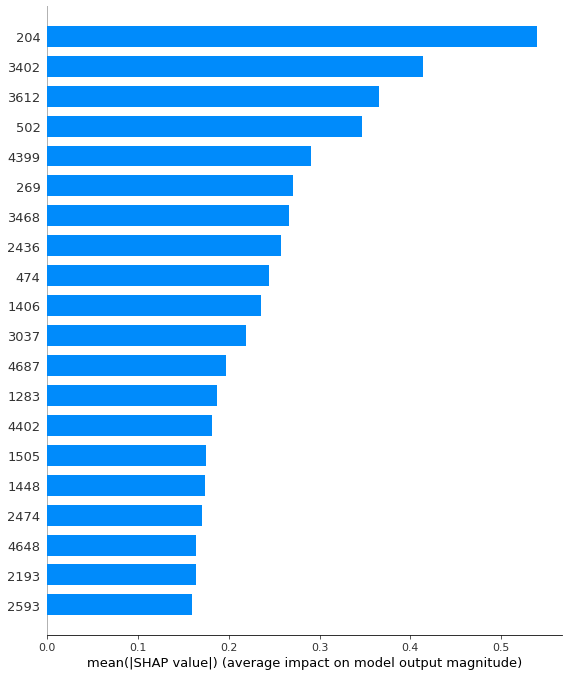

In [ ]:
shap.summary_plot(shap_values, X_test,plot_type='bar')

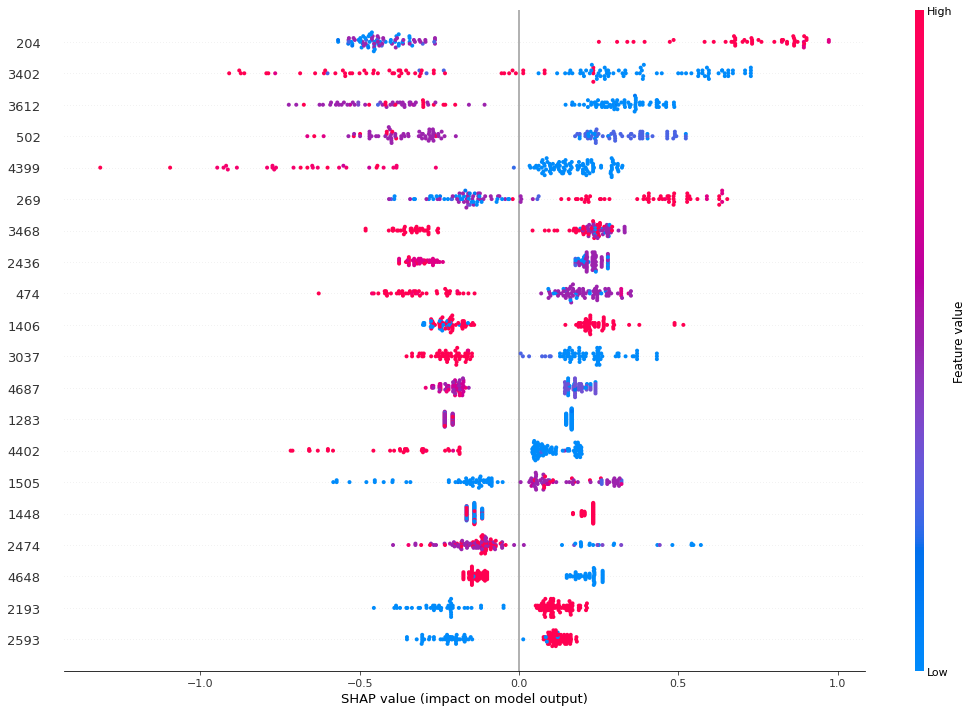

In [ ]:
shap.summary_plot(shap_values, X_test,plot_size=(15,10))

#Bonus - DL clustering for labeling data

In [ ]:
##
##